In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

x=iris.data
y=iris.target
names=list(iris.target_names)

In [5]:
X_train, X_test, y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=5)

## Cross Validation :

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [7]:
cross_val_score(KNeighborsClassifier(),X_train,y_train, cv=5, scoring='accuracy').mean()
#Il donne l'accuracy moyenne du model sur chaque cross validation (cv=5)

0.9523809523809523

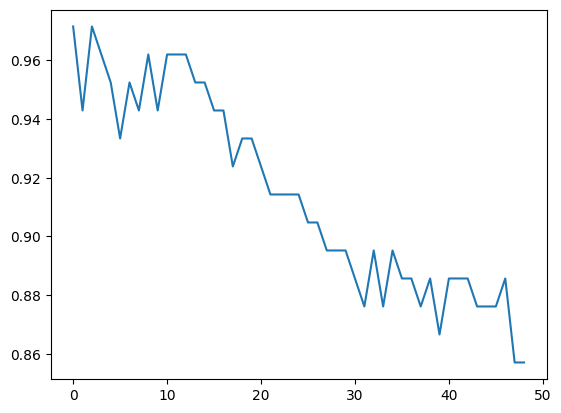

In [8]:
val_score=[]
for k in range (1,50) :
    score=cross_val_score(KNeighborsClassifier(k),X_train,y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
plt.plot(val_score)

## Validation Curve :

In [9]:
from sklearn.model_selection import validation_curve

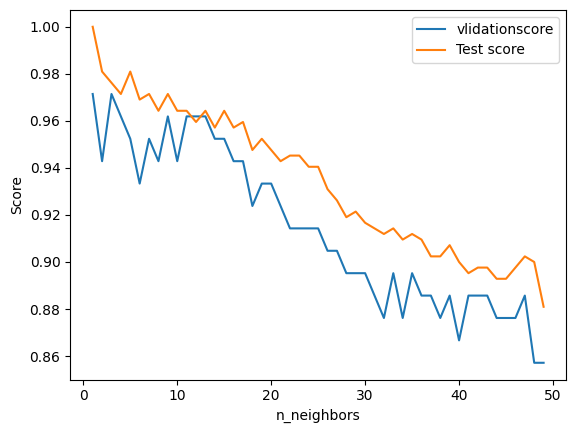

In [14]:
model=KNeighborsClassifier()
k=np.arange(1,50)

train_score, val_score=validation_curve(model,X_train, y_train,param_name='n_neighbors',param_range=k, cv=5)
plt.plot(k,val_score.mean(axis=1),label='vlidationscore')
plt.plot(k, train_score.mean(axis=1),label='Test score')
plt.ylabel('Score')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()

## Grid Search CV :

Cette fonction nous donne les best hyperparametres qu'on peut utiliser

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
params_grid={'n_neighbors': np.arange(1,20),'metric': ['euclidien','manhattan']}
grid=GridSearchCV(KNeighborsClassifier(), params_grid,cv=5)
grid.fit(X_train,y_train)

C:\Users\ELITEBOOK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
95 fits failed out of a total of 190.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ELITEBOOK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ELITEBOOK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidien', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [17]:
grid.best_score_
#Pour nous donner le meilleur score du meilleur parametre

0.9714285714285715

In [18]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [19]:
#pour enregisterer le meilleur model
model=grid.best_estimator_

In [20]:
model.score(X_test,y_test)

0.9111111111111111

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  2, 12]], dtype=int64)

## Learning Curve :

Cette fonction nous donne combien de données il faut utiliser avnt que notre performance se stabilize.

In [22]:
from sklearn.model_selection import learning_curve

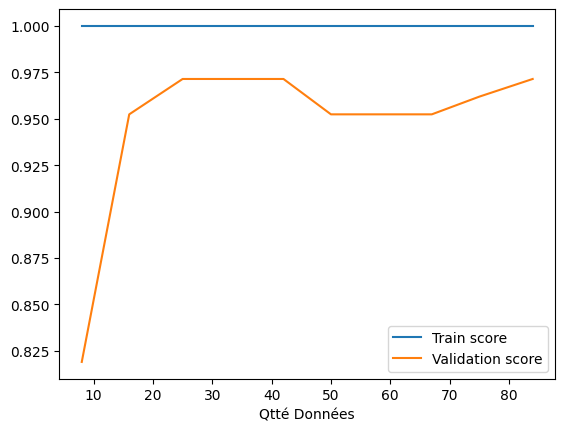

In [25]:
N, train_score, val_score=learning_curve(model,X_train, y_train, train_sizes=np.linspace(0.1,1,10), cv=5)
plt.plot(N, train_score.mean(axis=1), label='Train score')
plt.plot(N, val_score.mean(axis=1), label='Validation score')
plt.xlabel('Qtté Données')
plt.legend()
